# <center> 6_ANN

## 导入必要的库

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## 生成数据集

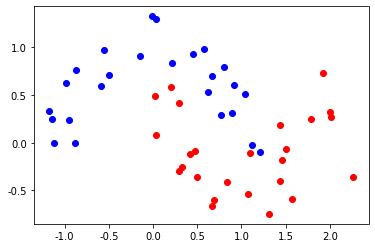

In [32]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

XX,yy=make_moons(n_samples=50,shuffle=True,noise=0.2,random_state=43)
XX_test,yy_test=make_moons(n_samples=20,shuffle=True,noise=0.2,random_state=43)

plt.plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'ro');
plt.plot(XX[np.where(yy == 0),0],XX[(np.where(yy == 0)),1],'bo');

## 用反向传播算法训练

In [33]:
def sigmod(x):
    return 1/(1+np.exp(-x))

def sigmod_derivative(x):
    return x*(1-x)

#重要参数
n_iter=10000
alpha=0.5
m=XX.shape[0]
input_dimension=XX.shape[1]
hidden_layer_1_dimension=10
output_dimension=1

X=XX
y=yy.reshape(-1,1)
Omega1=np.random.randn(input_dimension+1,hidden_layer_1_dimension)
Omega2=np.random.randn(hidden_layer_1_dimension+1,output_dimension)

J=np.empty(n_iter)
ii=np.empty(n_iter)
Accuracy=np.empty(n_iter)

#开始训练
for i in np.arange(n_iter):
    
    #定义矩阵
    a1=X
    a11=np.insert(a1,0,values=1,axis=1)
    Z2=np.dot(a11,Omega1)
    a2=sigmod(Z2)
    a21=np.insert(a2,0,values=1,axis=1)
    Z3=np.dot(a21,Omega2)
    a3=sigmod(Z3)
    #计算cost function
    H=np.log10(a3)
    H1=np.log10(1-a3)
    Y1=1-y
    J[i]=-(np.dot(y.T,H)+np.dot(Y1.T,H1))/m
    ii[i]=i
    
    #计算分类精度
    tp=len(np.where((a3>=0.5)&(y==1))[0])
    tn=len(np.where((a3<0.5)&(y==0))[0])
    Accuracy[i]=(tp+tn)/m
    
    #反向传播 Backpropagation
    delta3=a3-y
    d_Omega2=np.dot(a21.T,delta3)
    delta2=np.dot(delta3,Omega2[1:,:].T)*(a2*(1-a2))
    d_Omega1=np.dot(a11.T,delta2)
    
    #update weights
    
    Omega1=Omega1-alpha*d_Omega1/m
    Omega2=Omega2-alpha*d_Omega2/m
    

Text(0.5, 1.0, 'Train Accuracy')

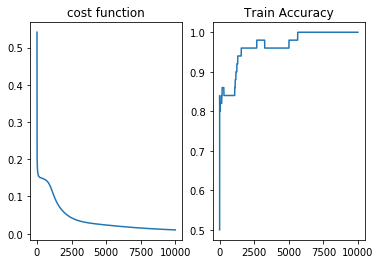

In [34]:
plt.subplot(121)
plt.plot(ii,J)
plt.title("cost function")
plt.subplot(122)
plt.plot(ii,Accuracy)
plt.title("Train Accuracy")

In [35]:
m_test=XX_test.shape[0]
X_test=XX_test
y_test=yy_test.reshape(-1,1)

a1=X_test
a11=np.insert(a1,0,values=1,axis=1)
Z2=np.dot(a11,Omega1)
a2=sigmod(Z2)
a21=np.insert(a2,0,values=1,axis=1)
Z3=np.dot(a21,Omega2)
a3=sigmod(Z3)

#计算分类精度

tp=len(np.where((a3>=0.5)&(y_test==1))[0])
tn=len(np.where((a3<0.5)&(y_test==0))[0])
Accuracy_test=(tp+tn)/m_test

print("Train Accuracy:",Accuracy[-1])
print("="*20)
print("Test Accuracy:",Accuracy_test)

Train Accuracy: 1.0
Test Accuracy: 0.95
